# Task 3: EDA and Visualizations

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Seaborn Configuration from Task 1

> Please use the code from Task 1 in the cell below to configure Seaborn and set your prefered theme. 

In [132]:
# Your Solution Here
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_theme(font_scale = 1.5)

#### Load Dataset from Task 2
Since we are working in a new Jupyter Notebook, the first task is to import the CSV dataset (**data/task2.csv**) we saved in Task 2. 

In [133]:
# Your Solution here
df = pd.read_csv('task2.csv')
df

,Unnamed: 0,Name,Type 1,Type 2,HP,Attack,Defense,Speed,Legendary,Weighted Score
0,0,Bulbasaur,Grass,Poison,45,49,49,45,False,47.8
1,1,Ivysaur,Grass,Poison,60,62,63,60,False,61.7
2,2,Venusaur,Grass,Poison,80,82,83,80,False,81.7
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,80,False,100.9
4,4,Charizard,Fire,Flying,78,84,78,100,False,82.6
...,...,...,...,...,...,...,...,...,...,...
409,409,Diancie,Rock,Fairy,50,100,150,50,True,100.0
410,410,DiancieMega Diancie,Rock,Fairy,50,160,110,110,True,118.0
411,411,HoopaHoopa Confined,Psychic,Ghost,80,110,60,70,True,85.0
412,412,HoopaHoopa Unbound,Psychic,Dark,80,160,60,80,True,106.0


## Task 3: Exploratory Data Analysis through Visualization

### 3.1. Data Analysis and Visualizations

#### 3.1.1. **Sample Research Question:** Which Pokemon Types are the best, as determined by the Weighted Score? 

***Important***: When referring to Type of the pokemon, please use just the **"Type 1"** Column.

To answer this question, we will first need to do wrangle the data to return the mean Weighted_Score, split by the Pokemon Type 1. 

Here is the goal of this analysis:

<img src="images/groupby.png" width="200px">


In [134]:
# Your Solution here
pd.DataFrame(df.groupby("Type 1").mean()["Weighted Score"])

,Weighted Score
Type 1,
Dragon,106.352381
Steel,93.600000
Ground,89.289474
Rock,84.977143
Fire,83.816667
Fighting,82.942857
Dark,78.900000
Psychic,76.394737
Water,75.784906


#### 3.1.2. Create a violin plot to show the distribution of Weighted_Scores split by all the Pokémon types (Type 1). 

Here is the goal:

<img src="images/violin.png" width="350px">

Text(0.5, 0, 'Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)')

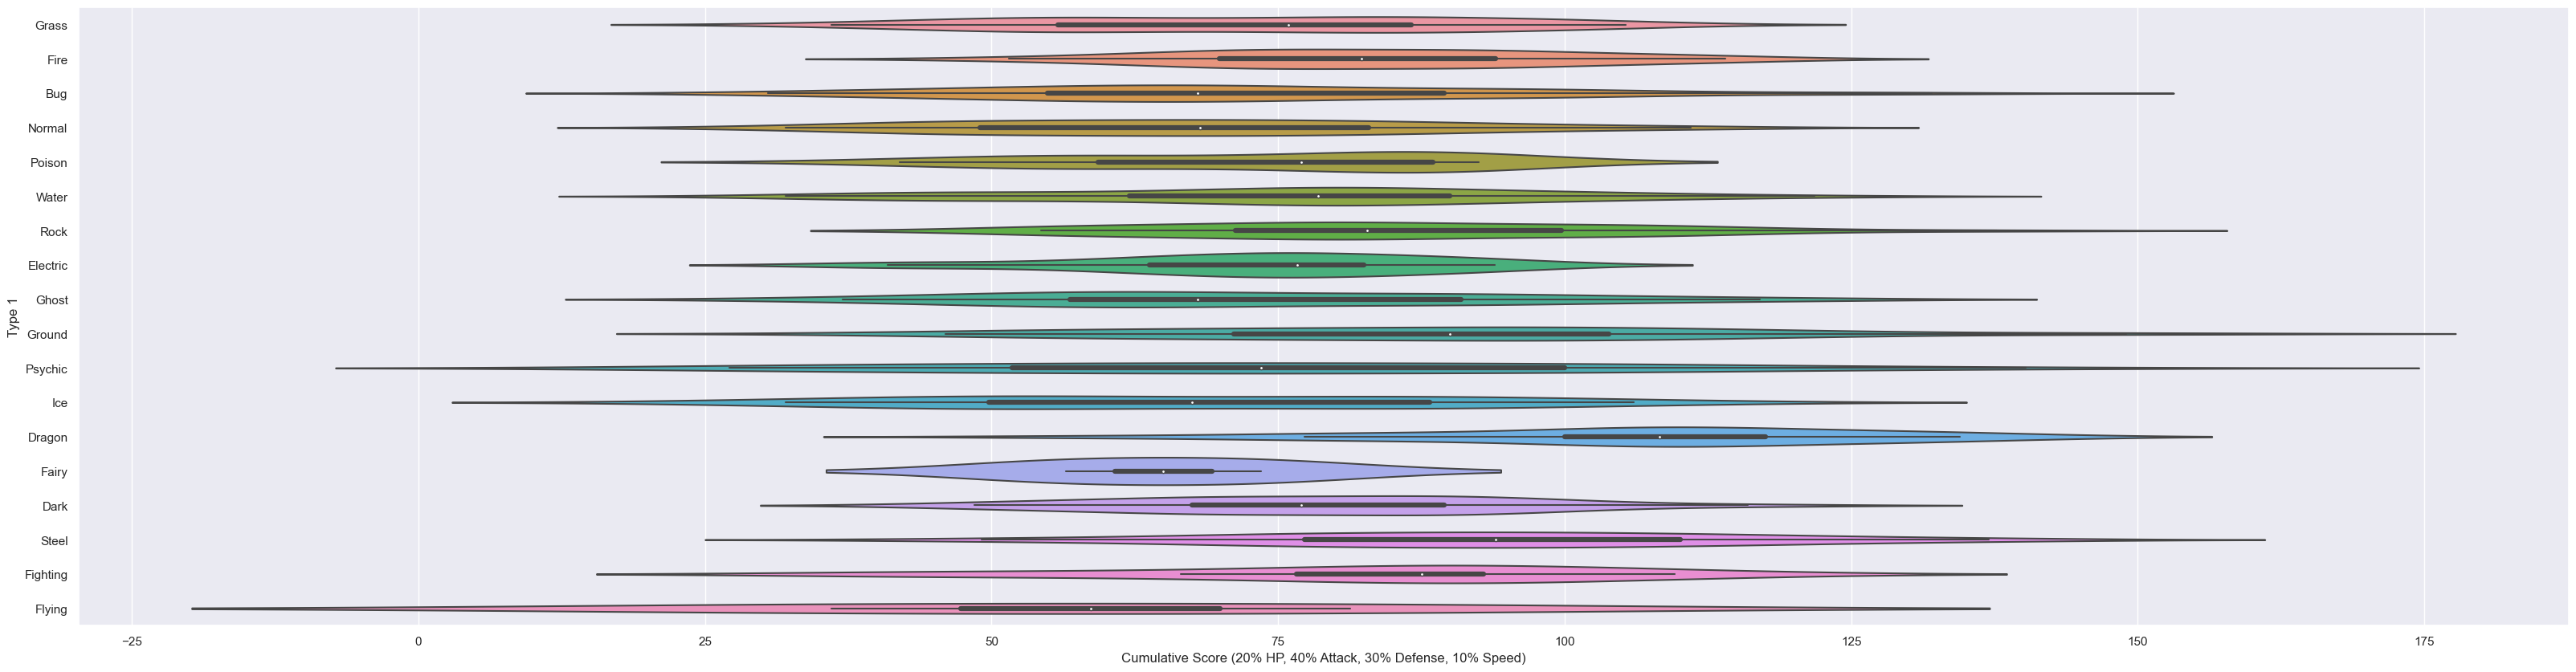

In [138]:
# Your Solution here
plt.figure(figsize=(3,7))
sns.violinplot(data = df, x = "Weighted Score", y = "Type 1")
plt.xlabel("Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)")

#### 3.1.3. Create a Box Plot and overlay a strip plot 

*Please use the Type 1 column.*

Here is the goal:

<img src="images/BoxPlot.png" width="350px">

Text(0.5, 0, 'Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)')

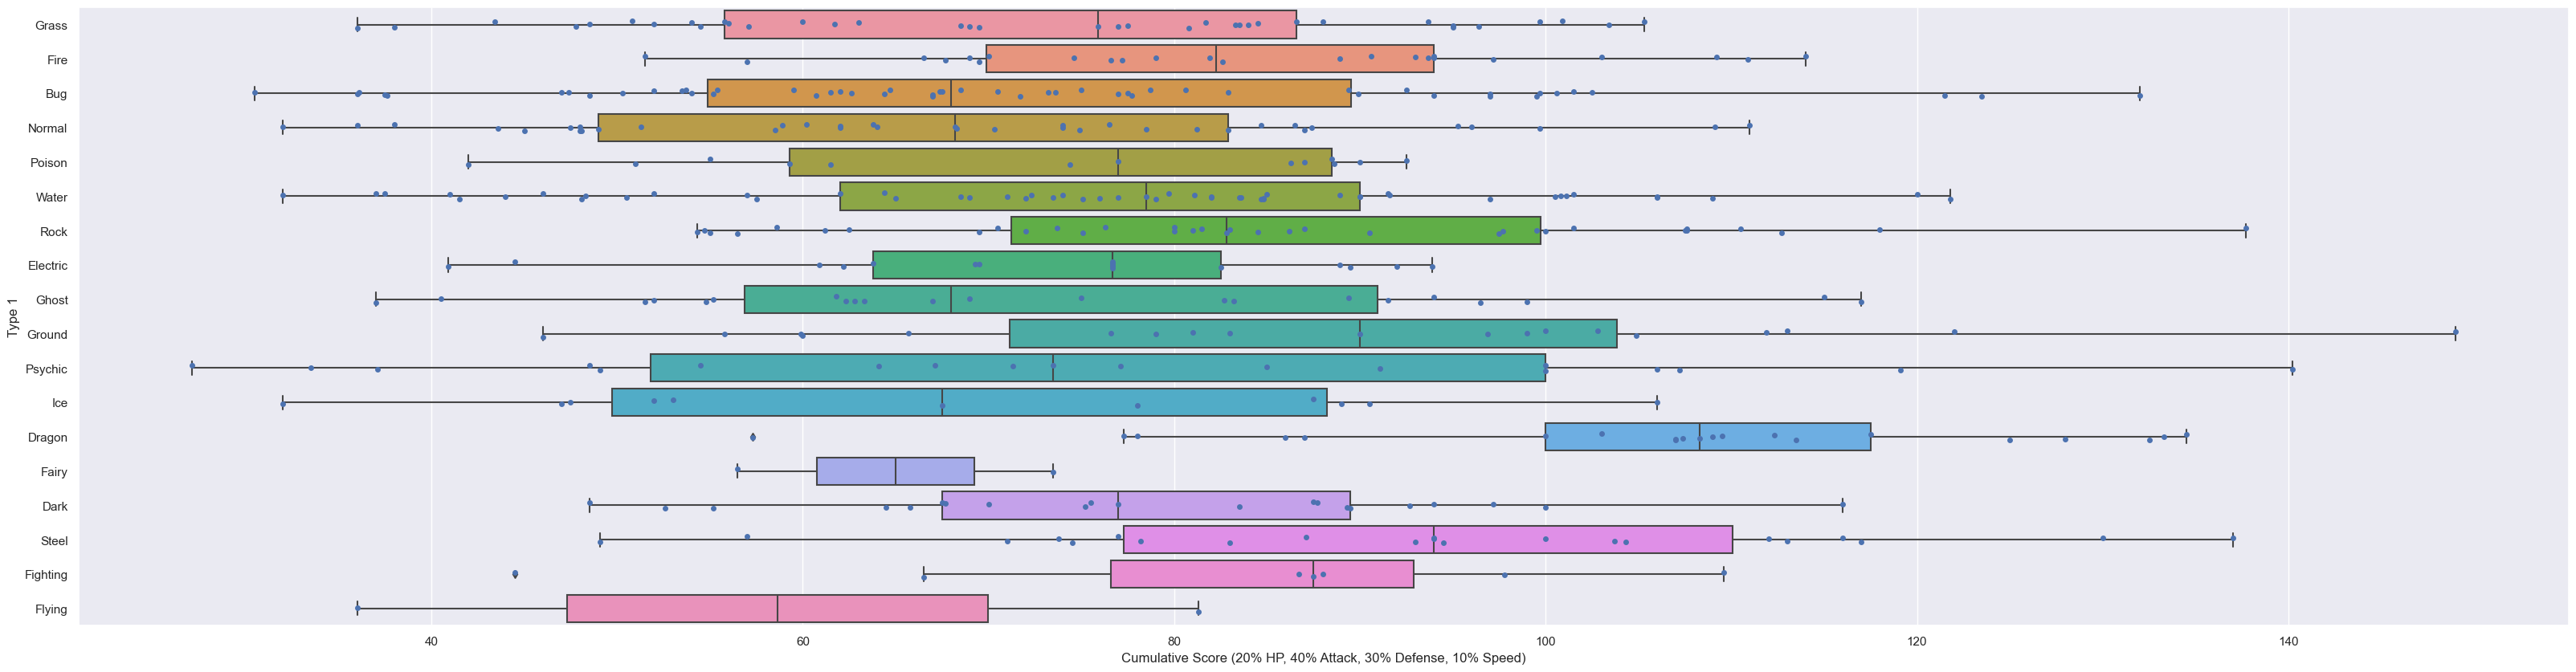

In [139]:
# Your Solution here 
sns.boxplot(data = df, x = "Weighted Score", y = "Type 1")
sns.stripplot(data = df, x = "Weighted Score", y = "Type 1")
plt.xlabel("Cumulative Score (20% HP, 40% Attack, 30% Defense, 10% Speed)")

#### 3.1.4. Create a [Hexbin plot with marginal distributions](http://seaborn.pydata.org/generated/seaborn.jointplot.html) 

This plot helps you visualize large amounts of data (and its distributions) by using colours to represent the number of points in a hexagonal shape.

Here is the goal:

<img src="images/jointplot.png" width="350px">

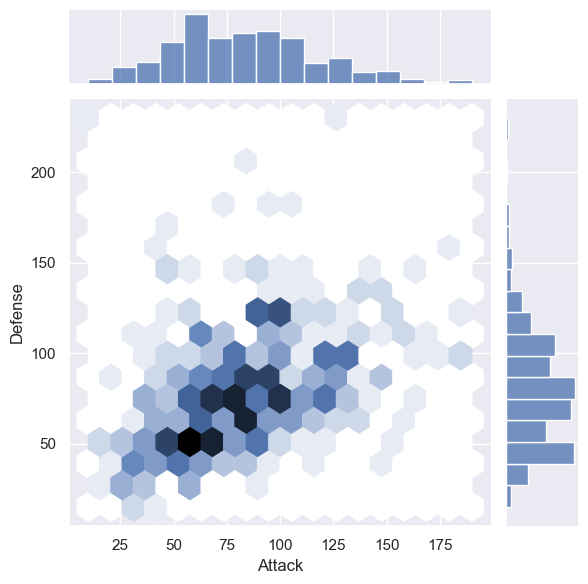

In [140]:
# Your Solution here 
sns.jointplot(data = df, x = "Attack", y = "Defense", kind="hex")

#### 3.1.5. Create a [PairPlot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) of the quantiative features of the pokémon dataset 

Here is the goal:

<img src="images/pairplot.png" width="350px">

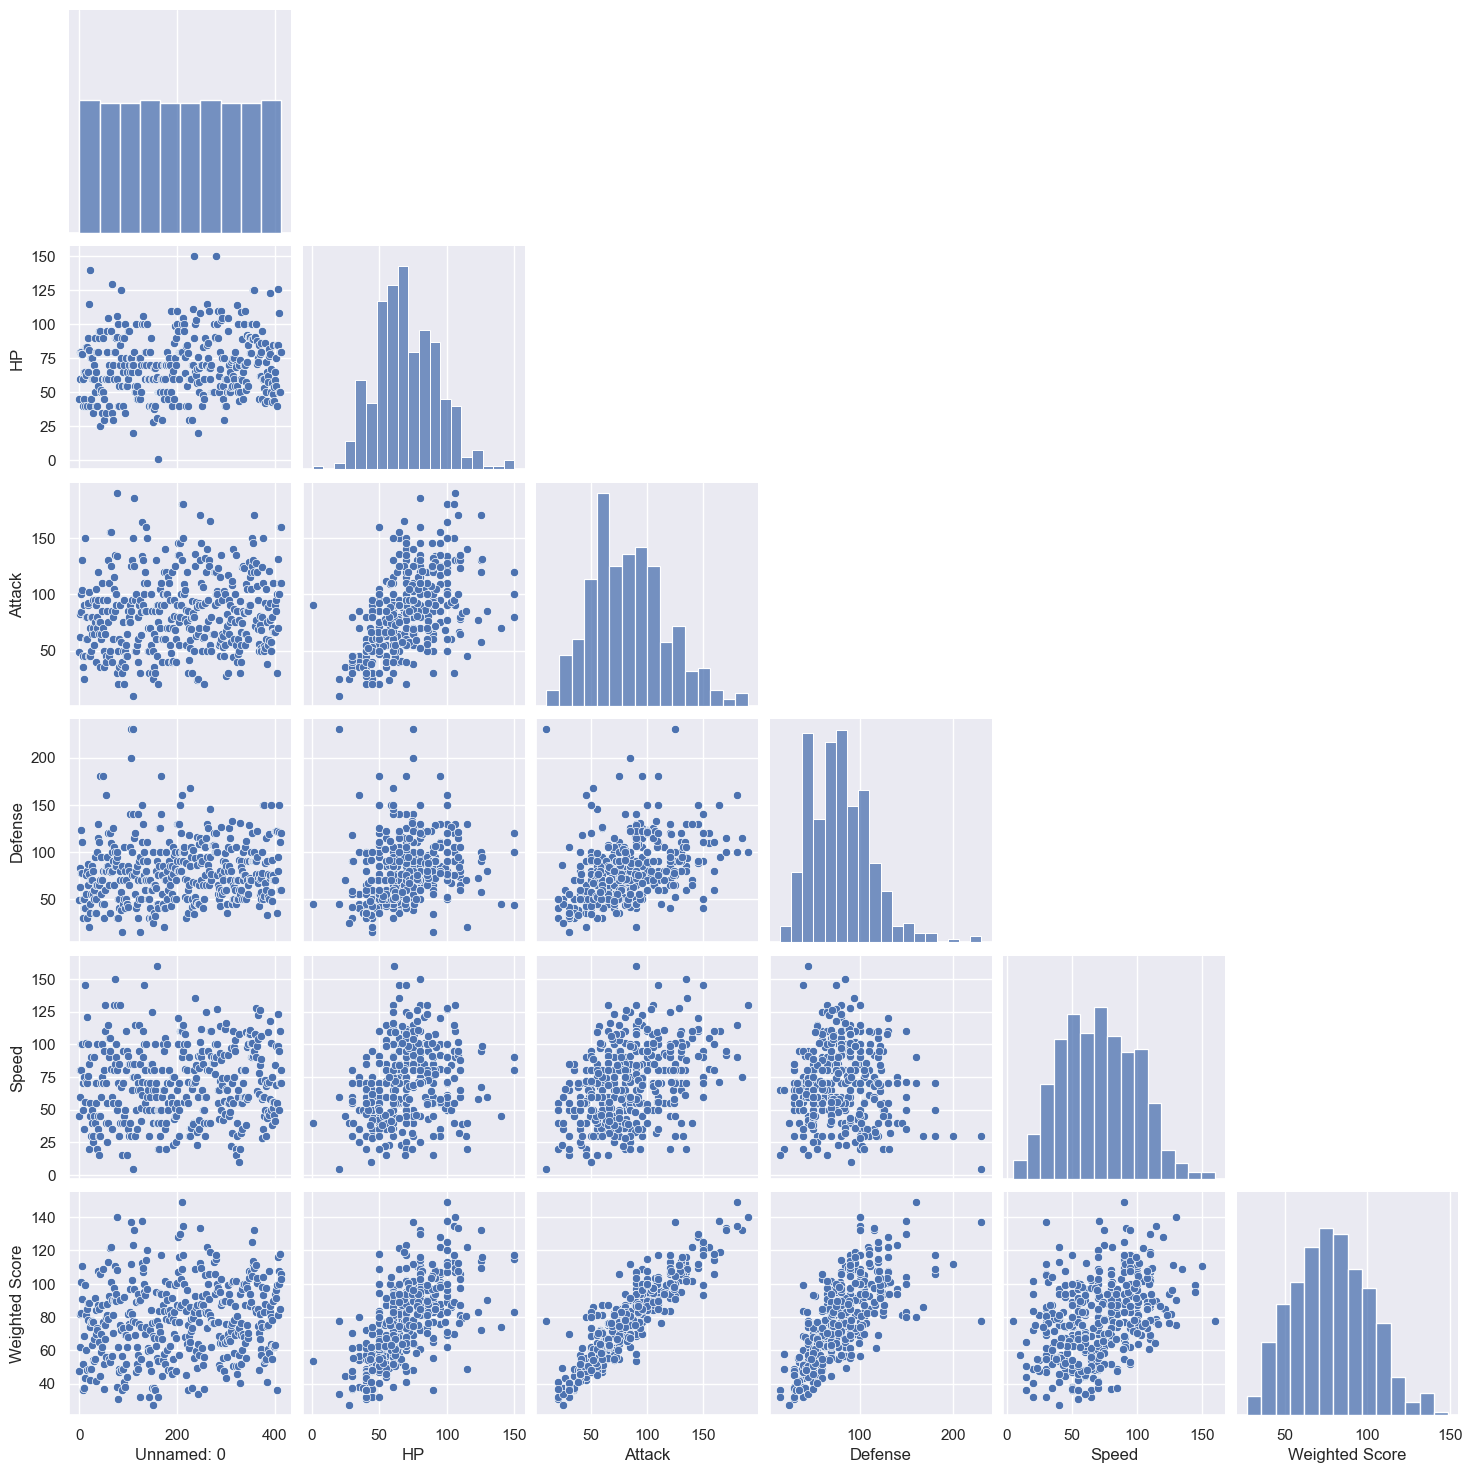

In [143]:
# Your Solution here
dfClean = df.drop(['Legendary'],axis = 1)
sns.pairplot(data=dfClean, corner = True)

#### 3.1.6. Create a visualization that helps you answer your first research question 

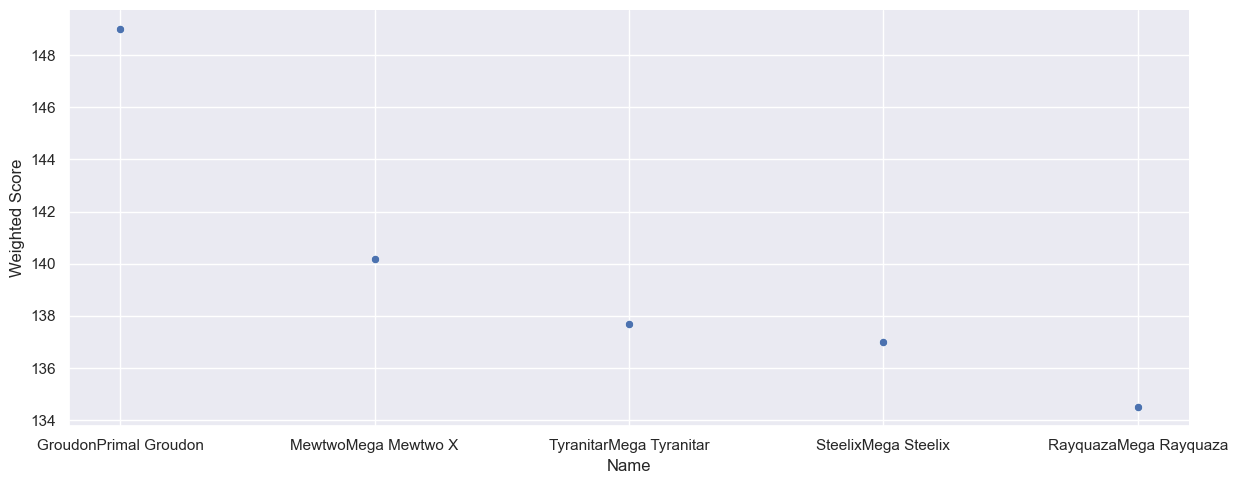

In [144]:
# Your Solution here
dfAll = df.sort_values(by=['Weighted Score'], ascending = False)
sns.relplot(data = dfAll.head(), y = 'Weighted Score', x = 'Name', aspect=20.7/8.27)

#### 3.1.7. Create a visualization that helps you answer your second research question 

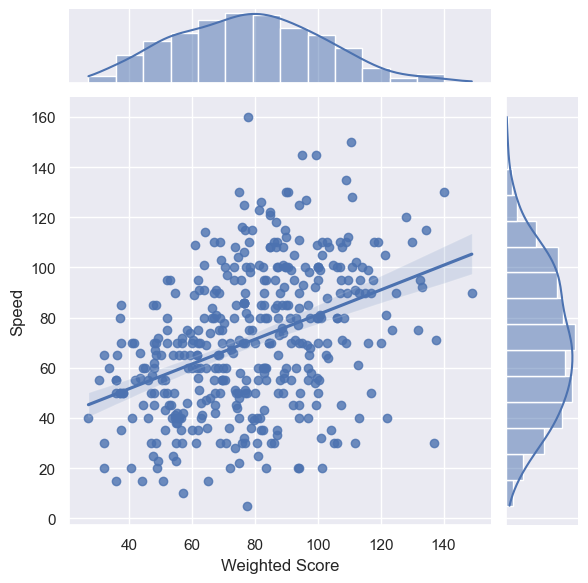

In [145]:
# Your Solution here
sns.jointplot(data = df, x = "Weighted Score", y = "Speed", kind = 'reg')

### 3.2. Summary and conclusions

#### 3.2.1. Summarize your findings and describe any conclusions and insight you were able to draw from your visualizations. 

- **Sample Research Question:** Which Pokemon Types are the best, as determined by the Weighted Score?
    - A few conclusions can be drawn that helps answer which Pokemon Types are the best through their Weighted Score.
    - The Dragon Type has the best Weighted Score when it comes to an average. This means that the floor of the Dragon Type is much higher and most Dragon Types are really strong
    - However, many more types have few pokemon that has a much higher (therefore stronger) Weighted Score than the Dragon Type. This means that while the floor of a those types are low, the ceiling is much higher; and this evens out in the mean score. For example, the ground type is seen to reach the highest Weighted Score but its average is dropped as more Pokemon appear on the bottom end of the type.
    

- **Research Question 1:** Which Pokemon itself is the best, as determined by the Weighted Score?
    - By sorting the original dataframe by the converted Weighted Score, then taking the head (which is the top 5 results), we can conclude the top 5 strongest Pokemon according to the Weighted Score. Groudon's Primal version appears to be by far the strongest with a Weighted Score of 149 followed by Mega MewTwo X, Mega Tyranitar, Mega Steelix, and finally, Mega Rayquaza with a Weighted Score of 134.5.
    

- **Research Question 2:** While speed only accounts for 10% of the Weighted Score, does it have a lot of correlation in terms of the total score regardless?
    - By inserting a line of best fit in the visualization, there is a slight trend of rising speed as the weigthed score also goes up. However, as the weighted score goes up times 5, the speed only about doubles. This shows that while there is a trend, speed itself is not a huge factor when determining how strong a Pokemon can be; as there are incredibly fast yet weak Pokemon, or extremely slow yet powerful Pokemon. 
    
**Notes: There should be some substantial comments and insight in this section. Take it seriously!**

In [19]:
# Your Solution Here